In [2]:
import time as time
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from sorting import hybrid_sort, merge_sort
from comparison_counter import ComparisonCounter

%matplotlib inline
%config InlineBackend.figure_format='retina'

np.random.seed(13)

# Testing the sorting algorithm

In [3]:
arr1 = [14, 40, 31, 28, 3, 15, 17, 51]
arr2 = [23, 23, 23, 23, 23, 23, 23, 23]

In [4]:
comparison_counter = ComparisonCounter()

print(merge_sort(deepcopy(arr1), comparison_counter))
assert comparison_counter.get_count() == 16

comparison_counter.reset_count()
print(merge_sort(deepcopy(arr2), comparison_counter))
assert comparison_counter.get_count() == 12

[3, 14, 15, 17, 28, 31, 40, 51]
[23, 23, 23, 23, 23, 23, 23, 23]


In [5]:
comparison_counter.reset_count()
print(hybrid_sort(deepcopy(arr1), comparison_counter, 4))
assert comparison_counter.get_count() >= 16

comparison_counter.reset_count()
print(hybrid_sort(deepcopy(arr2), comparison_counter, 4))
assert comparison_counter.get_count() == 10

[3, 14, 15, 17, 28, 31, 40, 51]
[23, 23, 23, 23, 23, 23, 23, 23]


# Input generation

In [6]:
sizes = [1000, 10000, 100000, 1000000, 10000000]
inputs = [np.random.randint(1, size + 1, size) for size in sizes]

for i in range(len(inputs)):
    print("Size: ", len(inputs[i]))
    print("Min value:", min(inputs[i]))
    print("Max value:", max(inputs[i]))
    print()

Size:  1000
Min value: 2
Max value: 1000

Size:  10000
Min value: 1
Max value: 9999

Size:  100000
Min value: 1
Max value: 100000

Size:  1000000
Min value: 2
Max value: 1000000

Size:  10000000
Min value: 1
Max value: 10000000



# (c) i: Analyzing Key Comparisons for Different Input Size (Threshold S fixed at 32)

In [ ]:
np.random.seed(42)

comparison_counter = ComparisonCounter()
sizes = [
    i
    for j in (
        [1000 * k for k in range(1, 11)],
        [10000 * k for k in range(1, 11)],
        [100000 * k for k in range(1, 11)],
        [1000000 * k for k in range(1, 11)],
        [10000000],
    )
    for i in j
]
inputs = [np.random.randint(1, size + 1, size) for size in sizes]

comparisons = []
execution_times = []

In [7]:
for arr_input in inputs:
    comparison_counter.reset_count()
    arr_copy = arr_input.copy()

    start_time = time.time()
    hybrid_sort(arr_copy, comparison_counter, S=32)
    end_time = time.time()

    comparisons.append(comparison_counter.get_count())
    execution_times.append(end_time - start_time)

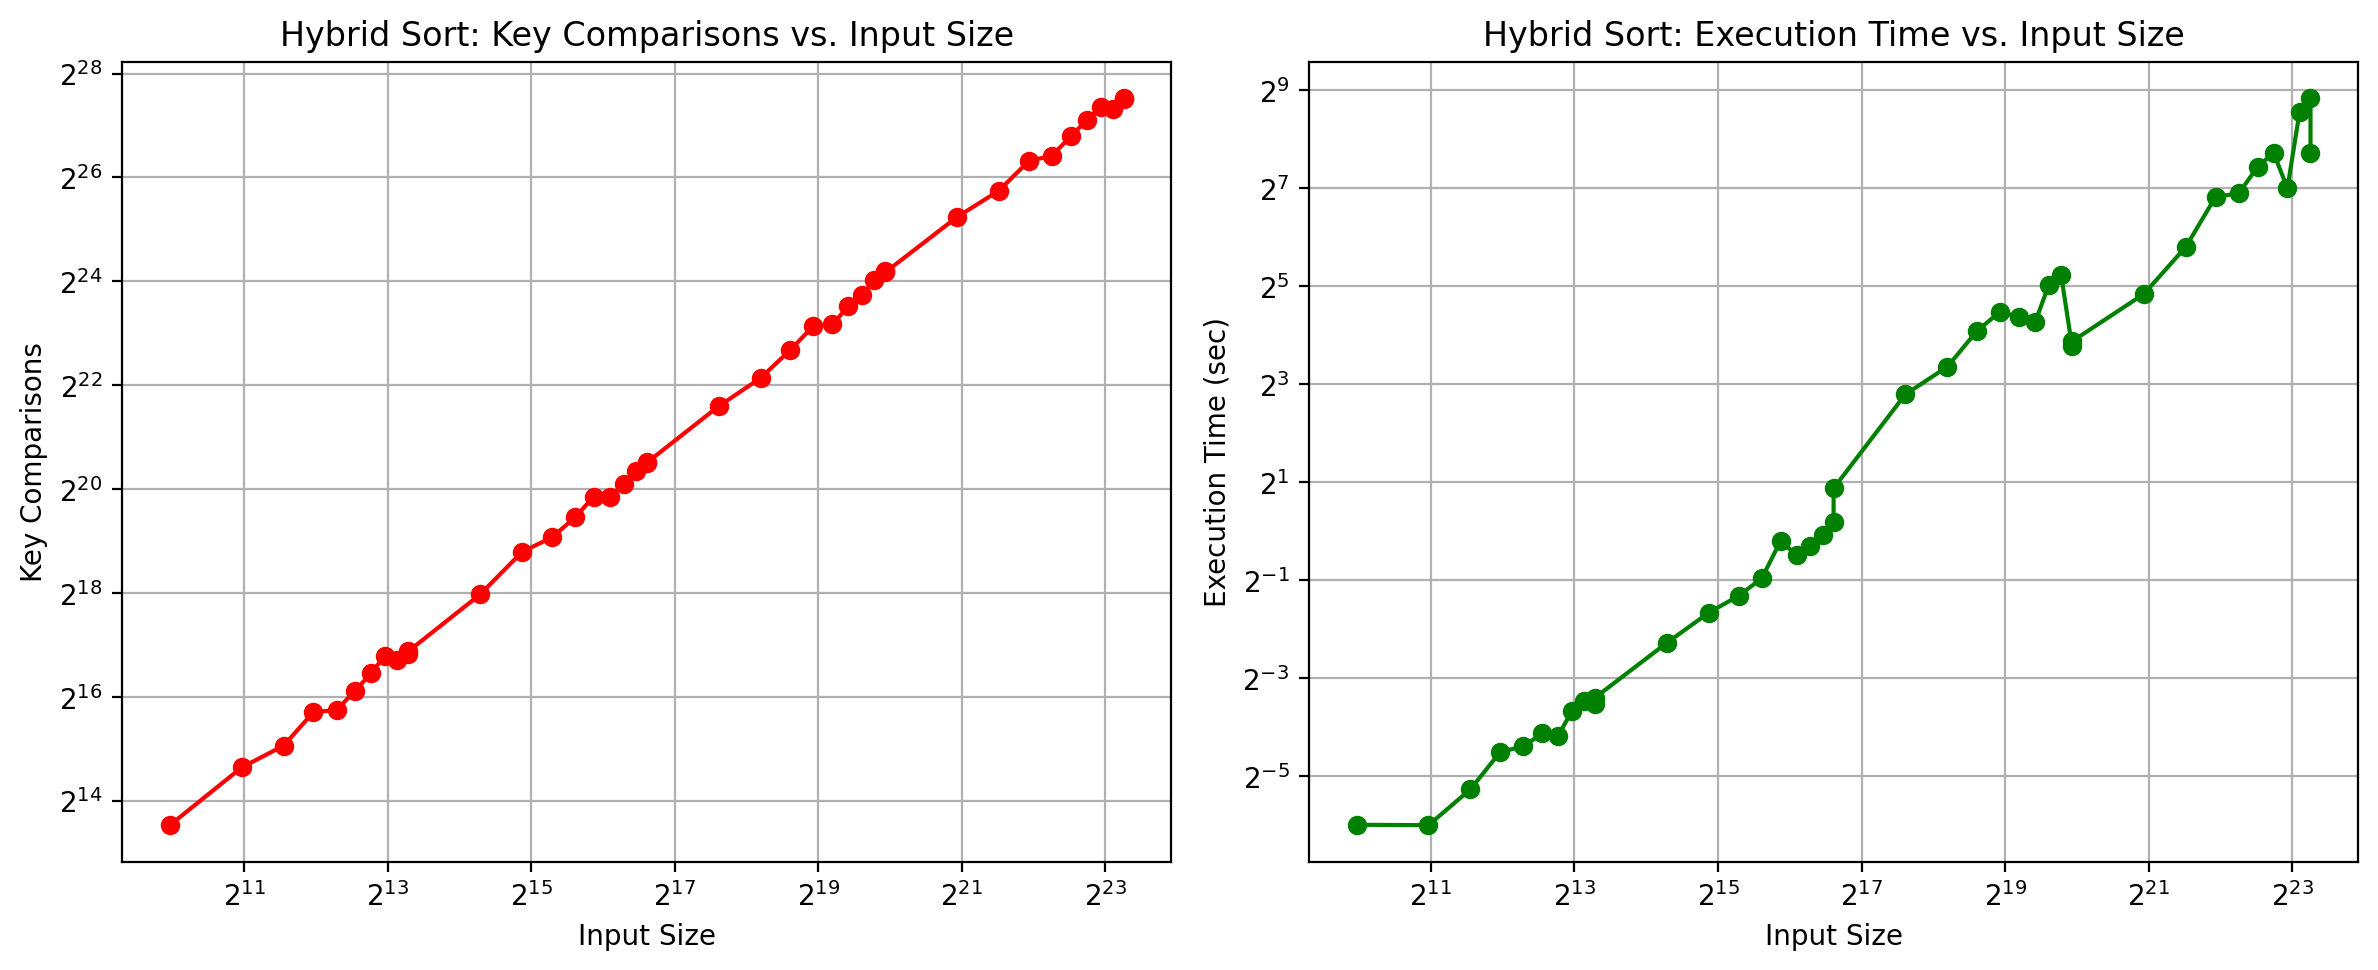

Results of Key Comparisons and Execution Times vs. Input Size:
     Input Size         Key Comparisons    Execution Time (sec)
          1000                11821               0.015728     
          2000                25536               0.015632     
          3000                34164               0.025967     
          4000                53448               0.044065     
          5000                54989               0.047617     
          6000                71269               0.057251     
          7000                90501               0.055541     
          8000               113683               0.078658     
          9000               107196               0.091098     
         10000               116247               0.086926     
         10000               120319               0.095086     
         20000               256939               0.206086     
         30000               453636               0.315940     
         40000               550317      

In [14]:
# Create a DataFrame
df = pd.DataFrame(
    {
        "Input Size": sizes,
        "Key Comparisons": comparisons,
        "Execution Time (sec)": execution_times,
    }
)

# Plot comparisons and execution time
plt.figure(figsize=(12, 5))

# Plot Key Comparisons vs. Input Size
plt.subplot(1, 2, 1)
plt.plot(df["Input Size"], df["Key Comparisons"], marker="o", linestyle="-", color="r")
plt.xscale("log", base=2)
plt.yscale("log", base=2)
plt.xlabel("Input Size")
plt.ylabel("Key Comparisons")
plt.title("Hybrid Sort: Key Comparisons vs. Input Size")
plt.grid(True)

# Plot Execution Time vs. Input Size
plt.subplot(1, 2, 2)
plt.plot(
    df["Input Size"], df["Execution Time (sec)"], marker="o", linestyle="-", color="g"
)
plt.xscale("log", base=2)
plt.yscale("log", base=2)
plt.xlabel("Input Size")
plt.ylabel("Execution Time (sec)")
plt.title("Hybrid Sort: Execution Time vs. Input Size")
plt.grid(True)

plt.tight_layout()
plt.show()

# Print table
print("Results of Key Comparisons and Execution Times vs. Input Size:")
print(df.to_string(index=False, justify="center", col_space=20))

## Comparison of Empirical Results with Theoretical Time Complexity
### Theoretical Analysis:

The Hybrid algorithm splits the array according to MergeSort until the unput size reaches threshold $S$, then Insertion Sort is called on the input array. Afterwards, $\frac{n}{S}$ sub-arrays of size $S$ are merged together.

The runtime complexity is determined by two parts:

1. $\frac{n}{S}$ calls of Insertion Sort on arrays of $S$ elements.
2. $\log\left( \frac{n}{S} \right)$ merge levels of arrays of size $S$.

For the average and worst case, the time complexity of the Insertion Sort component is $\frac{n}{S} \times O(S^{2})= O(n)$.
For the best case, the time complexity of the Insertion Sort component is $\frac{n}{S} \times O(S)= O(n \times S)$.

For the Merge component, there are $\log\left( \frac{n}{S} \right)$ merge levels, each level involves $O(n)$ comparisons, so the time complexity is $\log\left( \frac{n}{S} \right) \times O(n) = O\left( n \log\left( \frac{n}{S} \right) \right)$.

The total time complexity is then:
- The average and worst case: $O\left( n \times S + n\log\left( \frac{n}{S} \right) \right)$
- The best case: $O\left( n + n\log\left( \frac{n}{S} \right) \right)$.

For a fixed $S$, the time complexity can be simplified to $O(n + n \log(n)) = O(n \log(n))$ similar to MergeSort's. However, the number of actual key comparisons are expected to be higher for hybrid sort, but execution time can be expected to be lower due to time saving in memory allocation.

When plotting $\log(\text{key comparisons}) \text{vs} \log(\text{input size})$ for input size $n$, we expect to see a straight line with slope $\approx 1$, with a slight upward bend.

### Empirical Results & Comparisons:

With a fixed threshold $S=32$, we observed the following:

- The graph of $\log(\text{key comparisons}) \text{vs} \log(\text{input size})$ was indeed a straight line with slope $\approx 1$ as expected.
- The graph of $\log(\text{execution time}) \text{vs} \log(\text{input size})$ looked roughly like a straight line, but did not show a clear trend with many dips and jumps.

### Conclusion:
- The empirical results aligned with theoretical analysis.

# (c) ii: Analyzing Key Comparisons for Different S Values

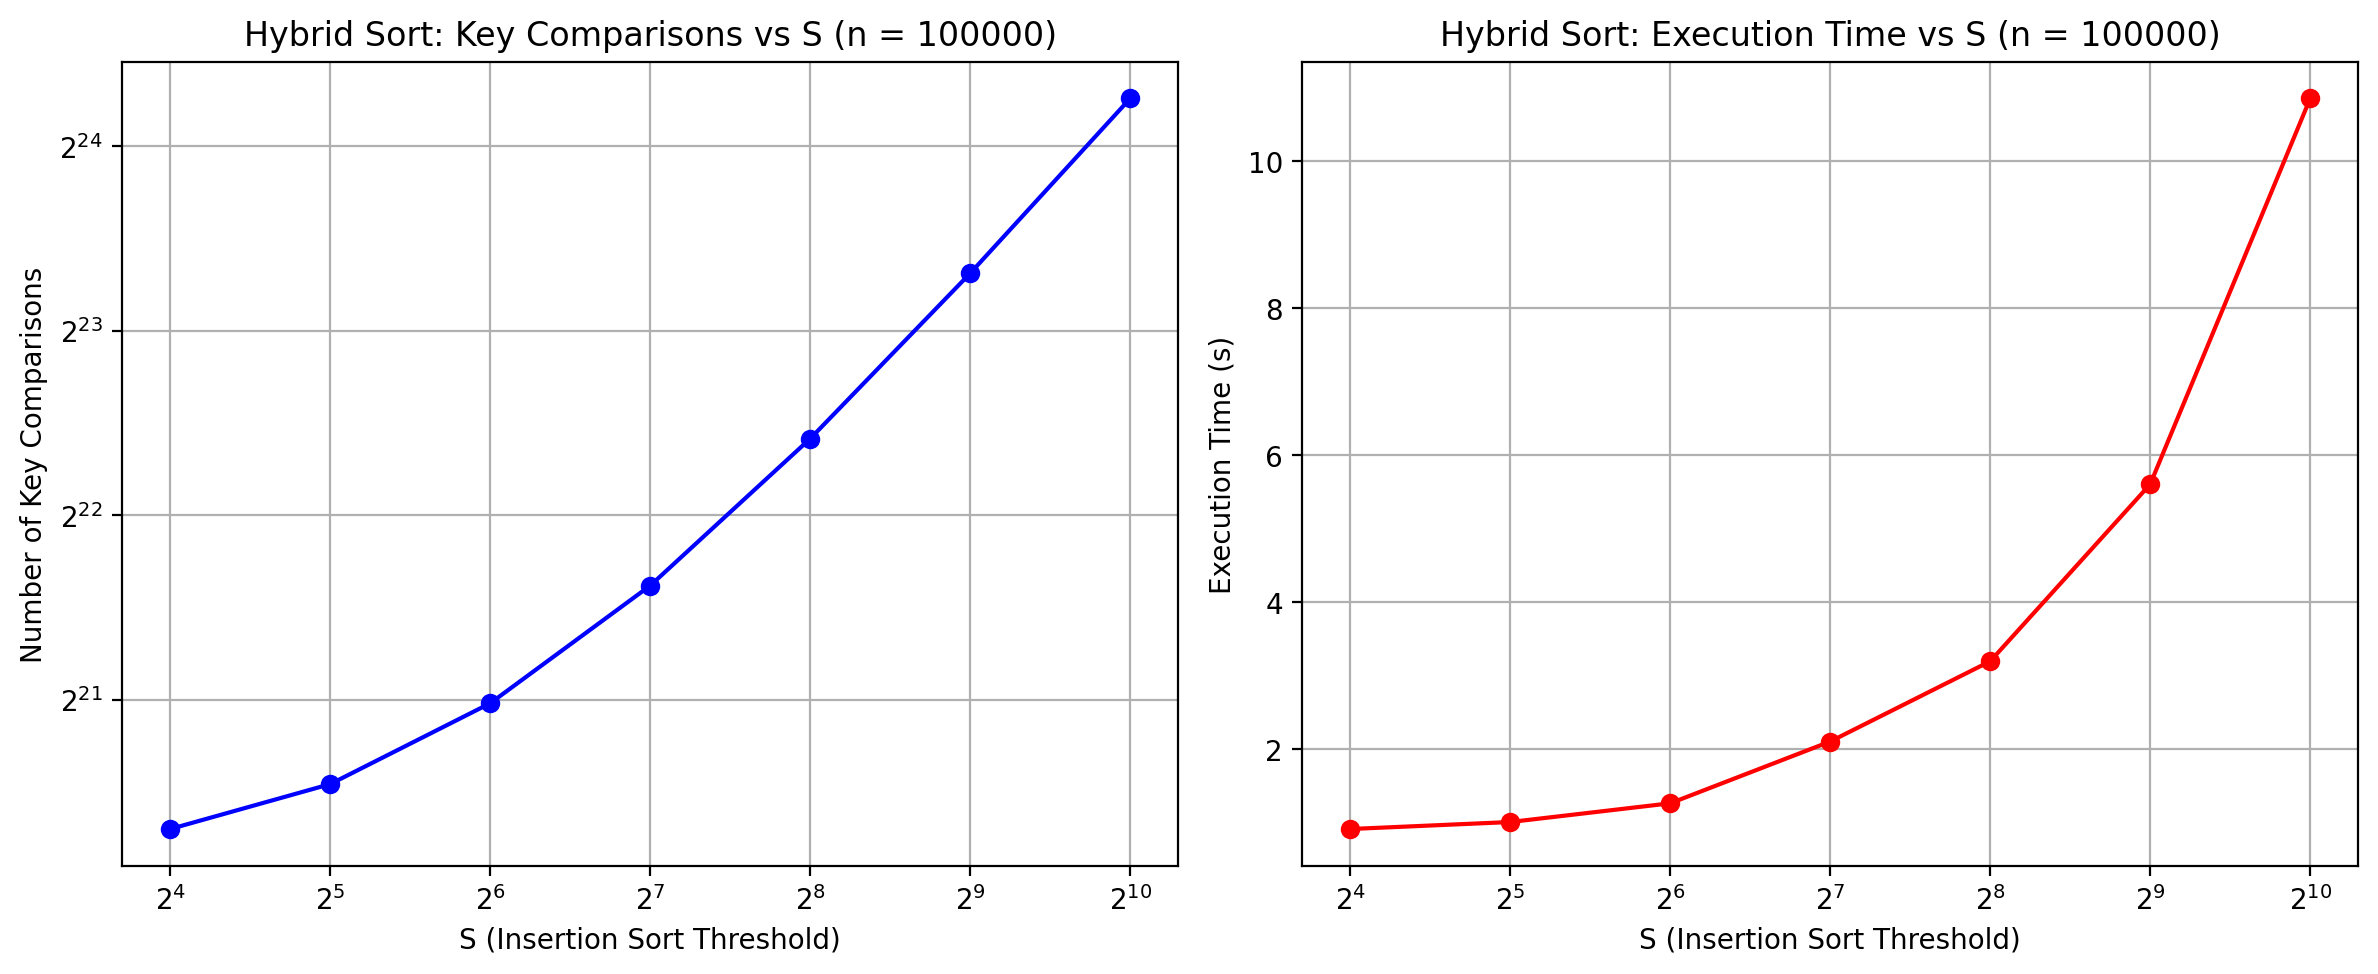

Results of Key Comparisons and Execution Times for Different S Values:
    S (Threshold)       Key Comparisons    Execution Time (sec)
          16                1289176              0.911662      
          32                1526112              1.006812      
          64                2067805              1.261386      
         128                3217387              2.101932      
         256                5589333              3.193943      
         512               10405942              5.602171      
        1024               20071191             10.850806      


In [7]:
n = 100000  # Fixed input size
np.random.seed(42)
fixed_input = np.random.randint(1, n + 1, n)

S_values = [16, 32, 64, 128, 256, 512, 1024]
comparisons = []
execution_times = []

for S in S_values:
    comparison_counter = ComparisonCounter()
    arr_copy = fixed_input.copy()

    start_time = time.time()
    hybrid_sort(arr_copy, comparison_counter, S)
    end_time = time.time()

    comparisons.append(comparison_counter.get_count())
    execution_times.append(end_time - start_time)

# Create a DataFrame to hold the results
data = {
    "S (Threshold)": S_values,
    "Key Comparisons": comparisons,
    "Execution Time (sec)": execution_times,
}

df = pd.DataFrame(data)

# Plot comparisons
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(S_values, comparisons, marker="o", linestyle="-", color="b")
plt.xscale("log", base=2)
plt.yscale("log", base=2)
plt.xlabel("S (Insertion Sort Threshold)")
plt.ylabel("Number of Key Comparisons")
plt.title(f"Hybrid Sort: Key Comparisons vs S (n = {n})")
plt.grid(True)

# Plot execution time
plt.subplot(1, 2, 2)
plt.plot(S_values, execution_times, marker="o", linestyle="-", color="r")
plt.xscale("log", base=2)
plt.xlabel("S (Insertion Sort Threshold)")
plt.ylabel("Execution Time (s)")
plt.title(f"Hybrid Sort: Execution Time vs S (n = {n})")
plt.grid(True)

plt.tight_layout()
plt.show()

# Print the table
print("Results of Key Comparisons and Execution Times for Different S Values:")
print(df.to_string(index=False, justify="center", col_space=20))

## Comparison of Empirical Results with Theoretical Time Complexity

#### Theoretical Analysis of the Time Complexity

The **Hybrid Sort** algorithm combines **Merge Sort** and **Insertion Sort**. The array is recursively divided by **Merge Sort** until subarrays reach a threshold size $S$, at which point **Insertion Sort** is applied. The merging process is handled by **Merge Sort** after **Insertion Sort** finishes on the subarrays.

The time complexity is influenced by the following components:

1. **Insertion Sort Component**: The **Insertion Sort** algorithm performs $O(S^2)$ comparisons for each subarray of size $S$. With $\frac{n}{S}$ subarrays, the total comparisons for **Insertion Sort** are:
   $$
   \frac{n}{S} \times O(S^2) = O(nS)
   $$

2. **Merge Sort Component**: The merging process occurs over $\log \frac{n}{S}$ levels, with each level involving $O(n)$ comparisons. The total comparisons for **Merge Sort** are:
   $$
   O(n \log \frac{n}{S})
   $$

Thus, the total time complexity of the Hybrid Sort algorithm is:
$$
O(nS + n \log \frac{n}{S})
$$

This suggests that for smaller values of $S$, the **Insertion Sort** component dominates, while for larger values, the **Merge Sort** component dominates. As $S$ increases, the number of key comparisons should grow smoothly, with **Insertion Sort** contributing more significantly for smaller $S$ values, and **Merge Sort** contributing for larger $S$ values.

#### Empirical Results

With a fixed input size $n = 100,000$, the number of key comparisons was observed to increase as $S$ increases, with larger $S$ values corresponding to higher key comparisons. This matches the expected trend, where **Insertion Sort** dominates at smaller $S$ values, causing a steeper rise in key comparisons, and **Merge Sort** dominates at larger $S$ values, leading to a more gradual increase.


#### Comparison with Theoretical Analysis

From the **theoretical analysis**, we expect a smooth increase in the number of key comparisons as $S$ increases. Specifically:

- **For smaller $S$** values (e.g., 16 to 32), **Insertion Sort** dominates. The number of key comparisons increases as the threshold increases because **Insertion Sort** is less efficient for larger subarrays.
- **For larger $S$** values (e.g., 512 to 1024), **Merge Sort** dominates. The growth of key comparisons slows down as **Merge Sort** becomes more efficient.

The observed results show a continuous, smooth increase in key comparisons as $S$ increases, aligning with the theoretical expectation. As $S$ gets larger, the **Merge Sort** component becomes more influential, leading to a more gradual increase in key comparisons, whereas **Insertion Sort** causes a sharper increase at smaller values of $S$.

#### Conclusion

The empirical results match the theoretical analysis in that:

- **Smaller $S$** values result in higher key comparisons due to the inefficiency of **Insertion Sort** for larger subarrays.
- **Larger $S$** values lead to a gradual increase in key comparisons as **Merge Sort** takes over and dominates.

This confirms that choosing the optimal threshold $S$ is crucial to balancing the performance of both algorithms. Too small a value for $S$ results in inefficient merging, while too large a value can cause **Insertion Sort** to be inefficient. The optimal value of $S$ lies between these extremes.
